[![preview notebook](https://img.shields.io/static/v1?label=render%20on&logo=github&color=87ce3e&message=GitHub)](https://github.com/open-atmos/PyMPDATA/blob/main/examples/PyMPDATA_examples/asian-option/analytic_solution.ipynb)
[![launch on mybinder.org](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/open-atmos/PyMPDATA.git/main?urlpath=lab/tree/examples/PyMPDATA_examples/asian-option/analytic_solution.ipynb)
[![launch on Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/open-atmos/PyMPDATA/blob/main/examples/PyMPDATA_examples/asian-option/analytic_solution.ipynb)

# Asian option analytical solution
This notebook contains the analytical solution for the Asian option. The solution is based on the following references:
- [Kemna, A. G. Z., & Vorst, A. C. F. (1990)](https://ideas.repec.org/a/eee/jbfina/v14y1990i1p113-129.html)
- [Mkhize, N. (2007)](http://hdl.handle.net/10413/429)

In [ ]:
import sys
if 'google.colab' in sys.modules:
    !pip --quiet install open-atmos-jupyter-utils
    from open_atmos_jupyter_utils import pip_install_on_colab
    pip_install_on_colab('PyMPDATA-examples')

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
r = 0.008
sigma = 0.2
s_t = 100
T = 30
K = 100
T_0 = 0
t = 0

kemna vorst p 11

In [3]:
def kemna_vorst(s_t=100, K=100, r=0.008, sigma=0.2, T=30, T_0=0):
    d_star = (1/2)*(r-(sigma**2) / 6)*(T-T_0)
    d = (np.log(s_t/K) + (1/2)*(r - (sigma**2) / 6)*(T-T_0))/(sigma*np.sqrt((T-T_0)/3))
    C_val = np.exp(d_star)*s_t*norm.cdf(d) - K*norm.cdf(d-sigma*np.sqrt((T-T_0)/3))
    return C_val

In [4]:
kemna_vorst()

24.899334865127113

Mkhize p 70, continuous fixed strike geometric average call option

In [5]:
def geometric_mkhize_general(s_t=100, K=100, r=0.008, sigma=0.2, T=30, T_0=0, t=0):
    s_wave_t = s_t ** ((T-t)/(T-T_0))
    d1 = ((T-T_0) * np.log(s_wave_t/K) + 0.5 * (r - 0.5 * sigma**2) * (T-t)**2 + (sigma**2 * (T-t)**3)/(3*(T-T_0)))/(sigma * np.sqrt(((T-t)**3)/3))
    d2 = ((T-T_0) * np.log(s_wave_t/K) + 0.5 * (r - 0.5 * sigma**2) * (T-t)**2)/(sigma * np.sqrt(((T-t)**3)/3))
    C_G = np.exp(-r*(T-t)) * (s_t * np.exp(((r-0.5*sigma**2)*((T-t)**2))/(2*(T-T_0)) + (sigma**2*((T-t)**3))/(6*(T-T_0)**2))*norm.cdf(d1) - K*norm.cdf(d2))
    P_G = np.exp(-r*(T-t)) * (K*norm.cdf(-d2) - s_t * np.exp((r-0.5*sigma**2)*((T-t)**2)/(2*(T-T_0)) + (sigma**2*(T-t)**3)/(6*(T-T_0)**2))*norm.cdf(-d1))
    return C_G, P_G

Mkhize p 69, continuous fixed strike geometric average call option, at t = T_0, should be the same as the previous one

In [6]:
def geometric_mkhize(s_t=100, K=100, r=0.008, sigma=0.2, T=30, T_0=0):
    d_1 = (np.log(s_t/K) + 0.5*(r + (sigma**2)/6)*(T-T_0))/(sigma*np.sqrt((T-T_0)/3))
    d_2 = d_1 - sigma*np.sqrt((T-T_0)/3)
    C_0 = s_t* np.exp(-0.5 * (r + (sigma**2)/6)*(T-T_0))*norm.cdf(d_1) - K*np.exp(-r*(T-T_0))*norm.cdf(d_2)
    P_0 = K*np.exp(-r*(T-T_0))*norm.cdf(-d_2) - s_t*np.exp(-0.5*(r + (sigma**2)/6)*(T-T_0))*norm.cdf(-d_1)
    return C_0, P_0

In [12]:
assert np.allclose(geometric_mkhize(), geometric_mkhize_general(t=0), rtol=1e-5)

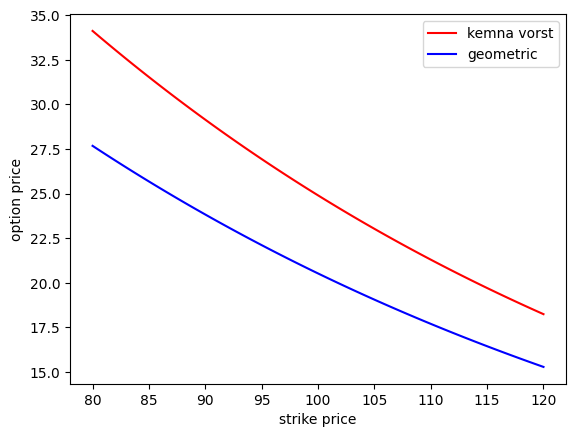

In [13]:
K_s = np.linspace(80, 120, 100)
C_kemna = []
C_geometric = []
for K in K_s:
    C_kemna.append(kemna_vorst(K=K))
    C_geometric.append(geometric_mkhize(K=K)[0])

plt.plot(K_s, C_kemna, label='kemna vorst', color='red')
plt.plot(K_s, C_geometric, label='geometric', color='blue')
plt.legend()
plt.xlabel('strike price')
plt.ylabel('option price')
plt.show()

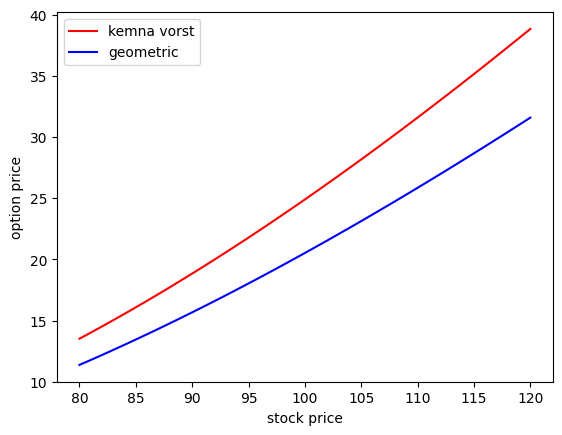

In [14]:
St_s = np.linspace(80, 120, 100)
C_kemna = []
C_geometric = []

for St in St_s:
    C_kemna.append(kemna_vorst(s_t=St))
    C_geometric.append(geometric_mkhize(s_t=St)[0])
    
plt.plot(St_s, C_kemna, label='kemna vorst', color='red')
plt.plot(St_s, C_geometric, label='geometric', color='blue')
plt.legend()
plt.xlabel('stock price')
plt.ylabel('option price')
plt.show()

Kemna Vorst p 12, asian is allways cheaper or equal to european

In [4]:
def european_option(s_t=100, K=100, r=0.008, sigma=0.2, T=30):
    d_1 = (np.log(s_t/K) + (r + 0.5*sigma**2)*T)/(sigma*np.sqrt(T))
    d_2 = d_1 - sigma*np.sqrt(T)
    C_0 = s_t*norm.cdf(d_1) - K*np.exp(-r*T)*norm.cdf(d_2)
    P_0 = K*np.exp(-r*T)*norm.cdf(-d_2) - s_t*norm.cdf(-d_1)
    return C_0, P_0

In [54]:
european_option()

(48.63941024359666, 27.302196350252007)

In [55]:
assert np.all(european_option() >= geometric_mkhize())

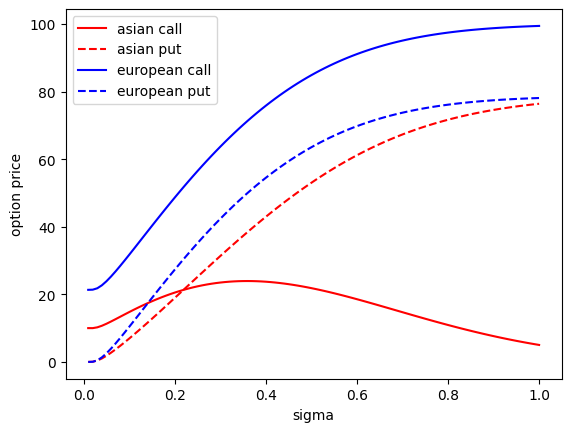

In [60]:
sigmas = np.linspace(0.01, 1, 100)
# r = np.linspace(0, 0.05, 100)
r = 0.008
asian_call = []
european_call = []
asian_put = []
european_put = []
for sigma in sigmas:
    asian_call.append(geometric_mkhize(sigma=sigma)[0])
    european_call.append(european_option(sigma=sigma)[0])
    asian_put.append(geometric_mkhize(sigma=sigma)[1])
    european_put.append(european_option(sigma=sigma)[1])

plt.plot(sigmas, asian_call, label='asian call', color='red')
plt.plot(sigmas, asian_put, label='asian put', color='red', linestyle='--')
plt.plot(sigmas, european_call, label='european call', color='blue')
plt.plot(sigmas, european_put, label='european put', color='blue', linestyle='--')
plt.legend()
plt.xlabel('sigma')
plt.ylabel('option price')
plt.show()

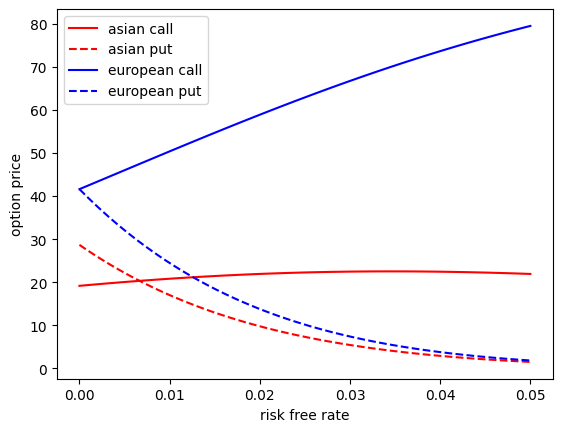

In [62]:
sigma = 0.2
rates = np.linspace(0, 0.05, 100)
asian_call = []
european_call = []
asian_put = []
european_put = []
for r in rates:
    asian_call.append(geometric_mkhize(r=r)[0])
    european_call.append(european_option(r=r)[0])
    asian_put.append(geometric_mkhize(r=r)[1])
    european_put.append(european_option(r=r)[1])

plt.plot(rates, asian_call, label='asian call', color='red')
plt.plot(rates, asian_put, label='asian put', color='red', linestyle='--')
plt.plot(rates, european_call, label='european call', color='blue')
plt.plot(rates, european_put, label='european put', color='blue', linestyle='--')
plt.legend()
plt.xlabel('risk free rate')
plt.ylabel('option price')
plt.show()

C:\Users\Pawel\AppData\Local\Temp\ipykernel_15556\1461075552.py:2: RuntimeWarning: divide by zero encountered in log
  d_1 = (np.log(s_t/K) + 0.5*(r + (sigma**2)/6)*(T-T_0))/(sigma*np.sqrt((T-T_0)/3))
C:\Users\Pawel\AppData\Local\Temp\ipykernel_15556\3701205595.py:3: RuntimeWarning: divide by zero encountered in log
  d1 = ((T-T_0) * np.log(s_wave_t/K) + 0.5 * (r - 0.5 * sigma**2) * (T-t)**2 + (sigma**2 * (T-t)**3)/(3*(T-T_0)))/(sigma * np.sqrt(((T-t)**3)/3))
C:\Users\Pawel\AppData\Local\Temp\ipykernel_15556\3701205595.py:4: RuntimeWarning: divide by zero encountered in log
  d2 = ((T-T_0) * np.log(s_wave_t/K) + 0.5 * (r - 0.5 * sigma**2) * (T-t)**2)/(sigma * np.sqrt(((T-t)**3)/3))


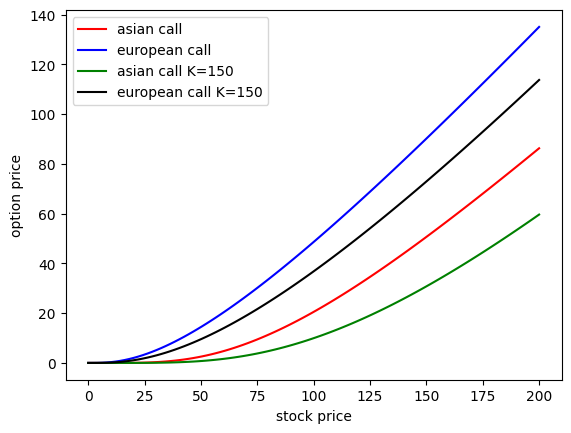

In [10]:
sigma = 0.2
rate = 0.008
s_ts = np.linspace(0, 200, 100)
asian_call = []
european_call = []
asian_put = []
european_put = []
asian_call2 = []
european_call2 = []
for s_t in s_ts:
    asian_call.append(geometric_mkhize(s_t=s_t)[0])
    european_call.append(european_option(s_t=s_t)[0])
    asian_put.append(geometric_mkhize(s_t=s_t)[1])
    european_put.append(european_option(s_t=s_t)[1])
    asian_call2.append(geometric_mkhize_general(s_t=s_t, K=150)[0])
    european_call2.append(european_option(s_t=s_t, K=150)[0])


plt.plot(s_ts, asian_call, label='asian call', color='red')
# plt.plot(s_ts, asian_put, label='asian put', color='red', linestyle='--')
plt.plot(s_ts, european_call, label='european call', color='blue')
# plt.plot(s_ts, european_put, label='european put', color='blue', linestyle='--')
plt.plot(s_ts, asian_call2, label='asian call K=150', color='green')
plt.plot(s_ts, european_call2, label='european call K=150', color='black')
plt.legend()
plt.xlabel('stock price')
plt.ylabel('option price')
plt.show()

In [11]:
# get difference between asian and european option at s=100
asian_call = geometric_mkhize()[0]
european_call = european_option()[0]
print(asian_call - european_call)

-28.116374004835848


In [12]:
# get difference between asian and european option at s=150 and k=150
asian_call = geometric_mkhize(K=150)[0]
european_call = european_option(K=150)[0]

In [13]:
print(asian_call - european_call)

-26.87418565222692
